<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Компьютерные игры

**Описание проекта**    
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.    
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».  

*Описание данных*    
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы долларов) 
EU_sales — продажи в Европе (миллионы долларов)  
JP_sales — продажи в Японии (миллионы долларов)  
Other_sales — продажи в других странах (миллионы долларов)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  
Данные за 2016 год могут быть неполными.  

## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
games=pd.read_csv('/datasets/games.csv')
display(games.head())
print(games.info())
display(games.describe())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод**  
Таблица содержит 11 столбцов и 16715 строк.  
В 6 столбцах есть пропущенные значения, изучим их отдельно.  
Есть по 2 пропускка в столбцах Name и Genre. Думаю, это случайные пропуски.     
Больше всего пропущенных значений в столбцах с оценками критиков и пользователей, а также в столбце с рейтингами. Может быть, не все игры оцениваются пользователями или критиками. Возможно, оценки еще не успели проставить. Я не думаю что это случайные пропуски, так как их очень много.


## Подготовка данных 

In [3]:
#Замените названия столбцов (приведите к нижнему регистру);
games.columns=games.columns.str.lower()

#Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
#-Сделаю ниже

#Изменим все буквы на строчные, чтобы в дальнейшем избежать дубликатов
games['name']=games['name'].str.lower()
games['platform']=games['platform'].str.lower()
games['genre']=games['genre'].str.lower()
games['rating']=games['rating'].str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#Обработайте пропуски при необходимости:
#Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
#Опишите причины, которые могли привести к пропускам;

print(games['name'].isna().sum())
display(games[games['name'].isna()].head())
games.dropna(subset=['name'], inplace=True)
display(games['name'].isna().sum())

2


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


0

In [5]:
print(games['year_of_release'].isna().sum())
display(games[games['year_of_release'].isna()].head())

269


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [6]:
def get_year(name):  
    if str(name)[-2:].isdigit():
        if 0 < int(name[-2:]) < 18:
            return 1999 + int(name[-2:])
    return float('nan')

games['year_of_release'].fillna(games['name'].apply(get_year), inplace=True)

print(games['year_of_release'].isna().sum())
games[games['year_of_release'].isna()].head()

249


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.0,0.29,74.0,7.9,e10+
609,space invaders,2600,NaN,shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN
627,rock band,x360,NaN,misc,1.93,0.33,0.0,0.21,92.0,8.2,t
657,frogger's adventures: temple of the frog,gba,NaN,adventure,2.15,0.18,0.0,0.07,73.0,tbd,e
678,lego indiana jones: the original adventures,wii,NaN,action,1.51,0.61,0.0,0.21,78.0,6.6,e10+


In [7]:
print(games['genre'].isna().sum())

0


In [8]:
print(games['critic_score'].isna().sum())
games[games['critic_score'].isna()].head()

8576


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [9]:
print(games['user_score'].isna().sum())
games[games['user_score'].isna()].head()

6699


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [10]:
print(games['rating'].isna().sum())
games[games['rating'].isna()].head()

6764


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [11]:
#Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;pdf.query('user_score=="tbd"')
print(games['user_score'].value_counts().sort_values(ascending=False).head())
games.query('user_score=="tbd"').head()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
Name: user_score, dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,wii,2010.0,sports,3.45,2.59,0.0,0.66,NaN,tbd,e
301,namco museum: 50th anniversary,ps2,2005.0,misc,2.08,1.35,0.0,0.54,61.0,tbd,e10+
520,zumba fitness 2,wii,2011.0,sports,1.51,1.03,0.0,0.27,NaN,tbd,t
645,udraw studio,wii,2010.0,misc,1.65,0.57,0.0,0.20,71.0,tbd,e
657,frogger's adventures: temple of the frog,gba,NaN,adventure,2.15,0.18,0.0,0.07,73.0,tbd,e


In [12]:
#Переведем оценки пользователей в числа, где это возможно
games['user_score']=pd.to_numeric(games['user_score'], errors='coerce')

In [13]:
#Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
games['general_sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16464 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
general_sales      16713 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


**Вывод**  
Перевела все данные (названия столбцов, а также данные по играм) в нижний регистр.  
В столбце name всего 2 пропуска, это немного, я их удалила.  
В столбце year_of_release  269 пропусков. Создала функцию, которая позволяет учесть год выхода игры, исходя из её названия. Таким образом получилось обработать 20 игр. Осталось еще 249 пропусков, оставила их.  
В столбце genre не осталось пропусков после удаления других пропусков.  
В столбце user_score 2424 значний "tbd" (анг. to be determined - будет определено позднее), заменила эти знаяения на NaN. После перевела оценки пользователей в числа, где это было возможно.  
В столбцах critic_score, user_score и rating много пропусков, но я оставила их без изменений.  
Добавила столбец general_sales с суммарными продажами по всем регионам.  
После всех изменений в таблице осталось 16715 строк и 12 столбцов. Пропуски остались в столбцах year_of_release, critic_score, user_score, rating.

## Исследовательский анализ данных

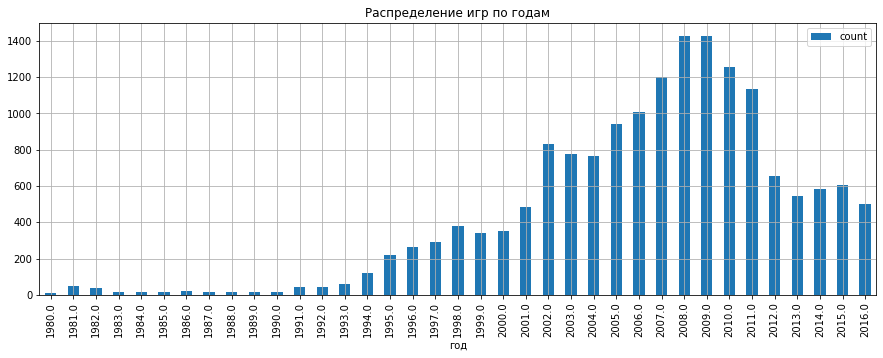

В период 1980-1994 вышло 2.18% игр


In [14]:
#Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
games_years=games.groupby('year_of_release').agg({'name':['count']})
games_years.columns=['count']
games_years.plot(kind='bar',y='count', grid=True,  figsize=(15, 5))
plt.title('Распределение игр по годам')
plt.xlabel("год")
plt.show()

print('В период 1980-1994 вышло {:.2%}'.format(len(games.query('year_of_release<1994'))/len(games)), 'игр')

**Вывод**   
Построила распределение выхода игр по годам. За 14 лет с 1980 до 1994 вышло всего 2% всех игр. В то время было очень мало компьютеров, игры были не востребованы. Этот период можно считать неважным. Удалила данные за этот период.   
После 2009 года на рынке компьютерных игр происходит спад кол-ва игр в год. Возможно это связано с тем, что игры стали сложными в производстве. Вместо большого кол-ва "простых" игр, производители стали выпускать на рынок меньшее кол-во игр, зато более высокого качества.  

In [15]:
games=games.query('year_of_release>1994')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15978 entries, 0 to 16714
Data columns (total 12 columns):
name               15978 non-null object
platform           15978 non-null object
year_of_release    15978 non-null float64
genre              15978 non-null object
na_sales           15978 non-null float64
eu_sales           15978 non-null float64
jp_sales           15978 non-null float64
other_sales        15978 non-null float64
critic_score       7995 non-null float64
user_score         7473 non-null float64
rating             9778 non-null object
general_sales      15978 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


In [16]:
#Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте 
#распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
most_profitable_games=games.pivot_table(index=['platform'], values='general_sales', aggfunc='sum'
                          ).reset_index().sort_values(by='general_sales', ascending=False)
most_profitable_games.head(10)

,platform,general_sales
12,ps2,1248.12
23,x360,961.88
13,ps3,931.34
20,wii,892.37
3,ds,802.77
11,ps,721.55
14,ps4,314.14
5,gba,312.88
15,psp,290.38
1,3ds,257.81


-------Платформа ps2 :-------


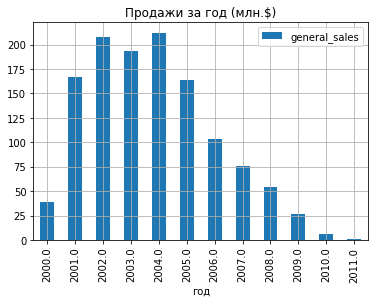

Жизненный цикл платформы занял: 12.0 лет


-------Платформа x360 :-------


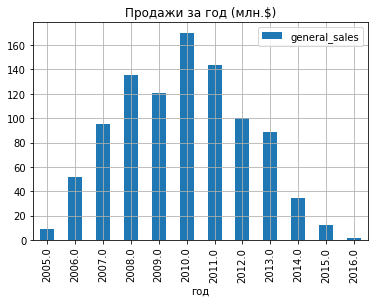

Жизненный цикл платформы занял: 12.0 лет


-------Платформа ps3 :-------


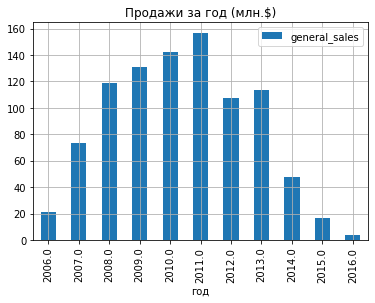

Жизненный цикл платформы занял: 11.0 лет


-------Платформа wii :-------


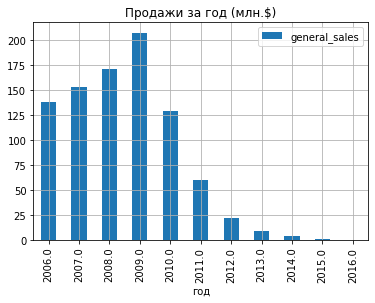

Жизненный цикл платформы занял: 11.0 лет


-------Платформа ds :-------


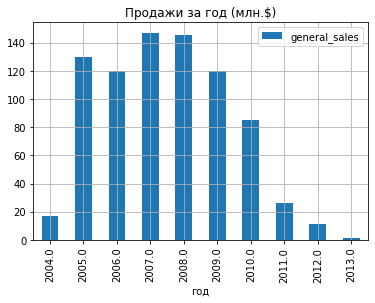

Жизненный цикл платформы занял: 10.0 лет


-------Платформа ps :-------


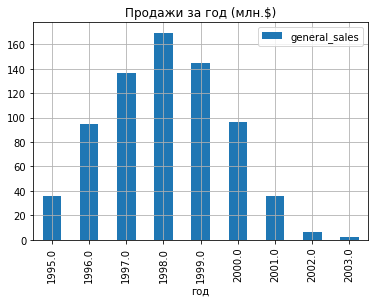

Жизненный цикл платформы занял: 9.0 лет




In [17]:
def platform (data, platform_i):
    data=data.query('platform==@platform_i').pivot_table(
        index=['year_of_release'], values='general_sales', aggfunc='sum').reset_index()
    print('-------Платформа', platform_i, ':-------')
    live=data['year_of_release'].max()-data['year_of_release'].min()+1
    data.plot(kind='bar', x='year_of_release',y='general_sales', grid=True)
    plt.title('Продажи за год (млн.$)')
    plt.xlabel('год')
    plt.show()
    print('Жизненный цикл платформы занял:', live, 'лет')
    print()
    print()

for column_value in most_profitable_games['platform'].head(6):
    platform(games, column_value)



**Вывод**    
Посмотрела, как менялись продажи по платформам. Выбрала платформы с наибольшими суммарными продажами и построила распределение по годам. Это платформы ps2, x360, ps3, wii, ds и ps. Выявила характерный срок, за который появляются новые и исчезают старые платформы - это около <b>10</b> лет.   

In [18]:
#Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате 
#исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
#Не учитывайте в работе данные за предыдущие годы.

In [19]:
#Оставлю только игры за последние 10 лет(актуальный период)
games_10=games.query('year_of_release>2006')

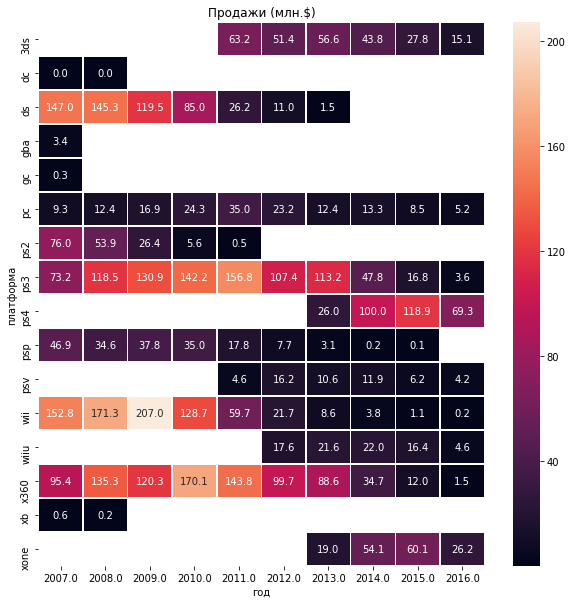

In [20]:
#Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
df=games_10.pivot_table(values='general_sales', index='platform', columns='year_of_release', aggfunc='sum')
plt.figure(figsize=(10,10))
sns.heatmap(df, annot=True, fmt=".1f", linewidths=0.5)
plt.title("Продажи (млн.$)")
plt.xlabel("год")
plt.ylabel("платформа")
plt.show()

**Вывод**  
Лидерами по продажам 2016 являются платформы <b>ps4 </b>и <b>xone</b>.
Они обе существуют на рынке 4 года, из которых первые три года продажи росли, а последний год упали.   
Платформы <b> 3ds, psv, wiiu</b> существуют 5-6 лет, однако последние несколько лет продажи падают.  
Платформы <b> pc, ps3, wii, x360</b> существуют не меньше 10 лет. Последние годы продажи падают. Похоже, что эти платформы уже заканчивает своё существование.  
Платформы <b>dc, ds, gba, gc, ps2, xb </b>не имеют данных за последние как минимум три года. Предполагаю, что эти платформы уже "умерли".  
Платформа <b>psp</b> не имеет данных за 2016 г. Продажи падают с 2010 года.

На вообще всех платформах падают продажи в 2016 году по сравнению с 2015. Возможно это связанано с каким-то кризисом, или выходом какой-то новой неучтенной игры, переходом на игры с телефона или др.  

Потенциально прибыльными считаю самые молодые и прибыльные платформы <b>ps4 </b>и <b>xone</b>, даже не смотря на то, что последний год продажи падают.

In [21]:
#Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах?
#А в средних продажах на разных платформах? Опишите результат.

games_10['platform'].value_counts()

ds      1779
ps3     1279
wii     1243
x360    1122
psp      895
pc       724
ps2      546
3ds      512
psv      429
ps4      392
xone     247
wiiu     147
gba        6
gc         4
xb         4
dc         2
Name: platform, dtype: int64

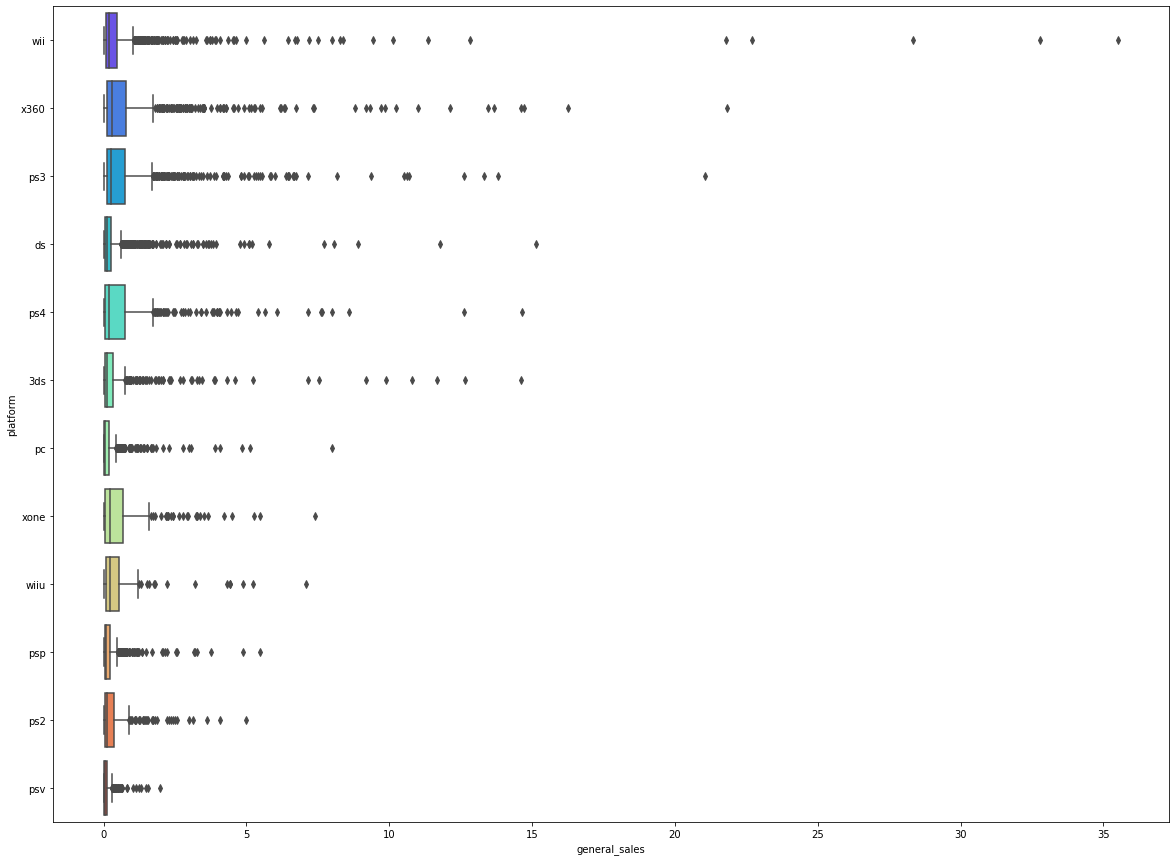

In [22]:
#Не буду рассматривать некоторые платформы, так как по ним очень мало информации
games_pop=games_10.query('platform!="xb" and platform!="gc" and platform!="dc" and platform!="gba"')

#Строю ящики с усами для популярных платформ за актуальный период
plt.figure(figsize=(20,15))
sns.boxplot(data=games_pop, y='platform', x='general_sales', palette='rainbow')
plt.show()

**Вывод**    
Построила ящик с усами для популярных платформ за актуальный период. Разница в продажах между платформами не вилика, среднее примерно одинаково.  
Выделяются платформы с чуть большим средним, это x360, ps3, ps4, xone, wiiu.

------------ 3ds -------------
Коэффициент корреляции между отзывами критиков и продажами:  0.3487397305984834
Коэффициент корреляции между отзывами позльзователей и продажами:  0.22207843643390882


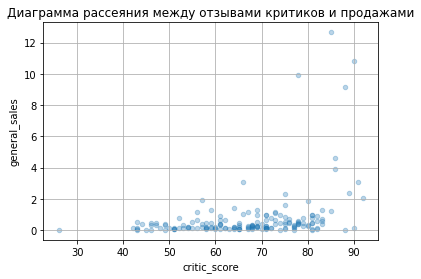

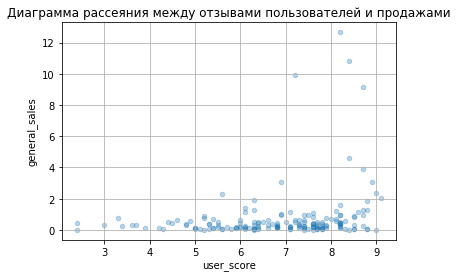

------------ ds -------------
Коэффициент корреляции между отзывами критиков и продажами:  0.27792618699086385
Коэффициент корреляции между отзывами позльзователей и продажами:  0.14182912512648585


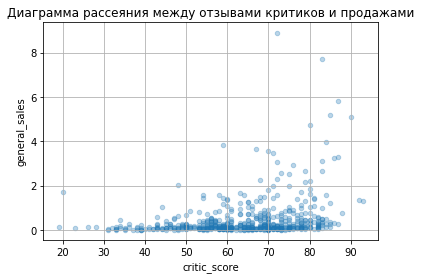

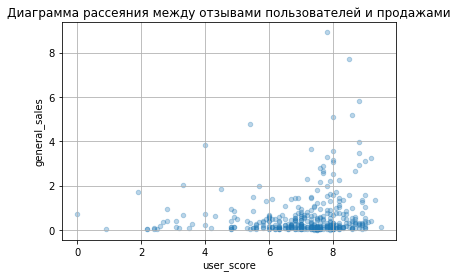

------------ pc -------------
Коэффициент корреляции между отзывами критиков и продажами:  0.29951634746667793
Коэффициент корреляции между отзывами позльзователей и продажами:  -0.009641965217754978


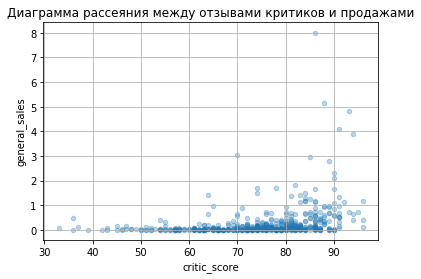

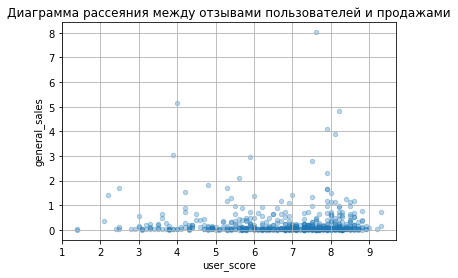

------------ ps2 -------------
Коэффициент корреляции между отзывами критиков и продажами:  0.37786643788499763
Коэффициент корреляции между отзывами позльзователей и продажами:  0.1654648027038808


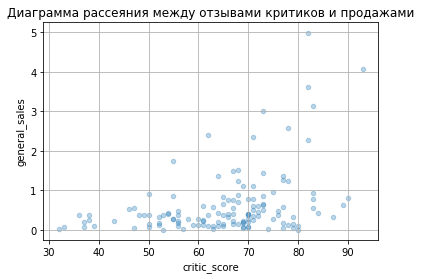

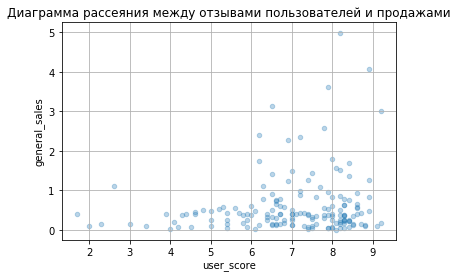

------------ ps3 -------------
Коэффициент корреляции между отзывами критиков и продажами:  0.433460205993085
Коэффициент корреляции между отзывами позльзователей и продажами:  0.126032944166753


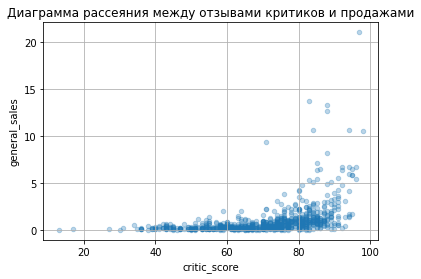

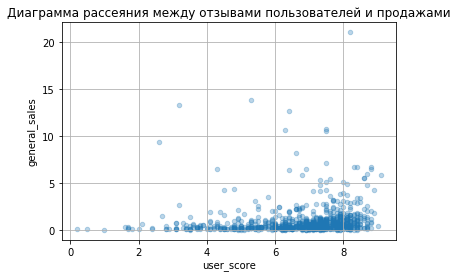

------------ ps4 -------------
Коэффициент корреляции между отзывами критиков и продажами:  0.40656790206178095
Коэффициент корреляции между отзывами позльзователей и продажами:  -0.031957110204556424


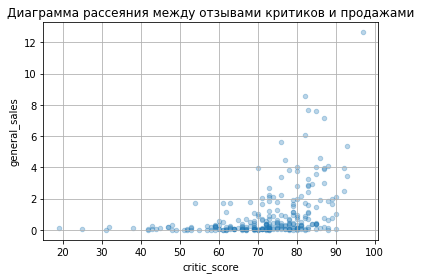

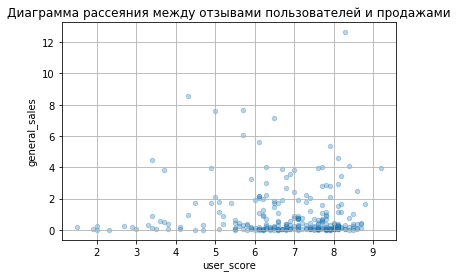

------------ psp -------------
Коэффициент корреляции между отзывами критиков и продажами:  0.32363859566288977
Коэффициент корреляции между отзывами позльзователей и продажами:  0.2433238934676027


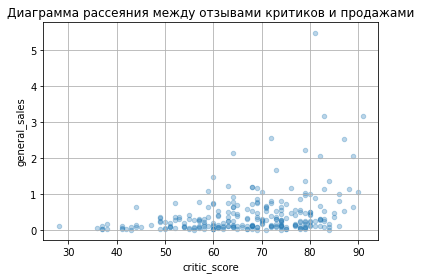

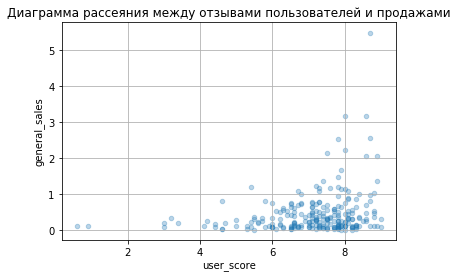

------------ psv -------------
Коэффициент корреляции между отзывами критиков и продажами:  0.13176292727608935
Коэффициент корреляции между отзывами позльзователей и продажами:  0.0134887568358865


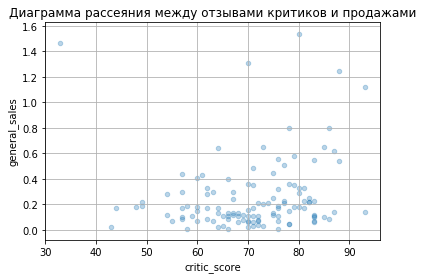

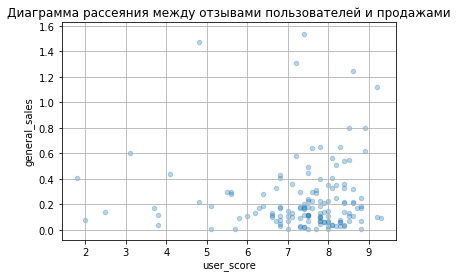

------------ wii -------------
Коэффициент корреляции между отзывами критиков и продажами:  0.23742990281149387
Коэффициент корреляции между отзывами позльзователей и продажами:  0.14139857076386414


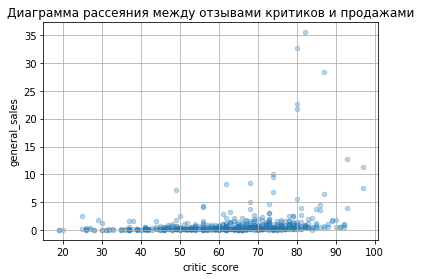

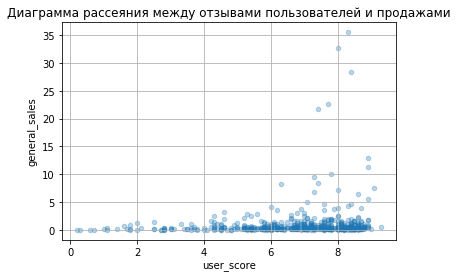

------------ wiiu -------------
Коэффициент корреляции между отзывами критиков и продажами:  0.34837976012017485
Коэффициент корреляции между отзывами позльзователей и продажами:  0.4002190202148617


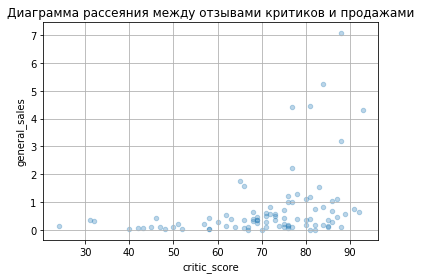

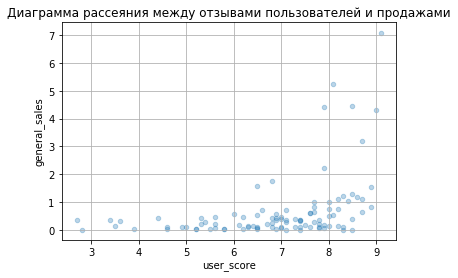

------------ x360 -------------
Коэффициент корреляции между отзывами критиков и продажами:  0.3972267740250465
Коэффициент корреляции между отзывами позльзователей и продажами:  0.11419867853844


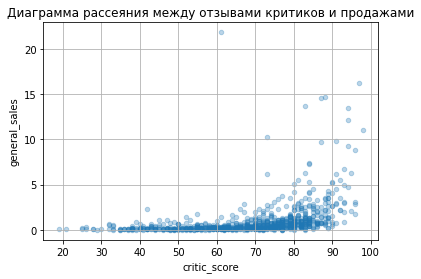

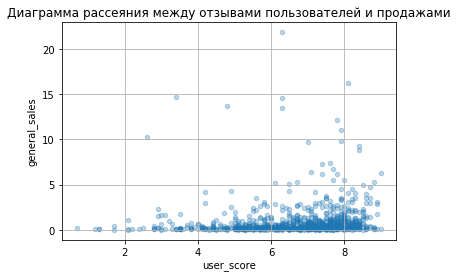

------------ xone -------------
Коэффициент корреляции между отзывами критиков и продажами:  0.4169983280084017
Коэффициент корреляции между отзывами позльзователей и продажами:  -0.06892505328279414


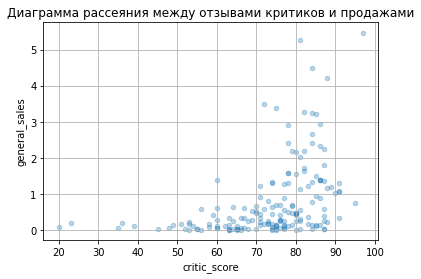

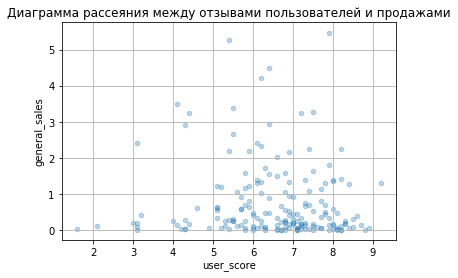

In [23]:
#Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
#Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
#Соотнесите выводы с продажами игр на других платформах.
def corr (df, platform):
    print('------------',platform,'-------------')
    data=df.query('platform==@platform')
    print('Коэффициент корреляции между отзывами критиков и продажами: ', data['critic_score'].corr(data['general_sales']))
    print('Коэффициент корреляции между отзывами позльзователей и продажами: ', data['user_score'].corr(data['general_sales']))
    
    data.plot(x='critic_score', y='general_sales', kind='scatter', alpha=0.3, grid=True)
    plt.title('Диаграмма рассеяния между отзывами критиков и продажами')
    plt.show()

    data.plot(x='user_score', y='general_sales', kind='scatter', alpha=0.3, grid=True)
    plt.title('Диаграмма рассеяния между отзывами пользователей и продажами')
    plt.show()

for column_value, column_slice in games_pop.groupby('platform'):
    corr(games_pop, column_value)

In [24]:
#Получим отдельно таблицы с коэф-тами корреляции по платформам:
games_for_corr=games_pop[['name','platform', 'user_score','critic_score', 'general_sales']]
corralation=games_for_corr.groupby('platform').corr()
corralation=corralation[['general_sales']].reset_index().sort_values(by='level_1').reset_index()
corralation

,index,platform,level_1,general_sales
0,34,xone,critic_score,0.416998
1,1,3ds,critic_score,0.348740
2,19,psp,critic_score,0.323639
3,31,x360,critic_score,0.397227
4,4,ds,critic_score,0.277926
5,28,wiiu,critic_score,0.348380
6,7,pc,critic_score,0.299516
7,16,ps4,critic_score,0.406568
8,25,wii,critic_score,0.237430
9,10,ps2,critic_score,0.377866


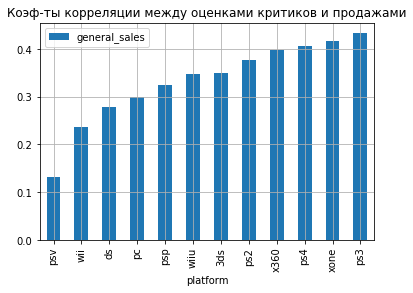

In [25]:
corralation.loc[0:11,:].sort_values(by='general_sales').plot(kind='bar', x='platform',y='general_sales', grid=True)
plt.title('Коэф-ты корреляции между оценками критиков и продажами')
plt.show()

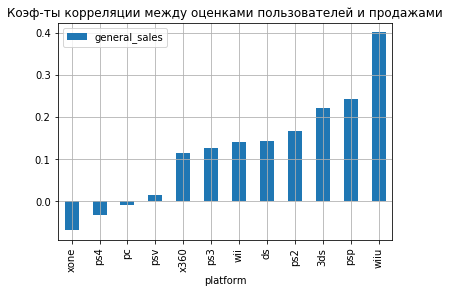

In [26]:
corralation.loc[24:35,:].sort_values(by='general_sales').plot(kind='bar', x='platform',y='general_sales', grid=True)
plt.title('Коэф-ты корреляции между оценками пользователей и продажами')
plt.show()

**Вывод**    
Согласно получившимся коэффициентам кореляции:  
У оценок критиков и пользователей есть некоторое влияние на продажи игр.   
Так, например, на платформе wiiu оценки пользователей сыграли большую роль в продажах этой игры.
На остальных платформах это влияние существенно меньше.  
На платформе psv оценки критиков не оказывают практически никакого значения. А у платформ ps4, xone и ps3 оценки кртиков сильнее
влияют на продажи.


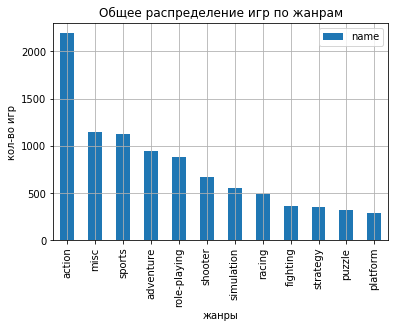

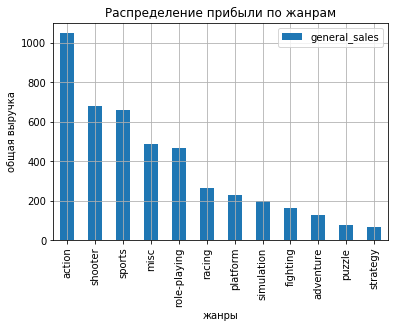

In [27]:
#Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры
#с высокими и низкими продажами?
games_pop.pivot_table('name', 'genre', aggfunc='count').sort_values(by='name', ascending=False).plot(
    kind='bar', y='name', grid=True)
plt.title("Общее распределение игр по жанрам")
plt.xlabel("жанры")
plt.ylabel("кол-во игр")
plt.show()

games_pop.pivot_table('general_sales', 'genre', aggfunc='sum').sort_values(by='general_sales', ascending=False
                                                                          ).plot(kind='bar', y='general_sales', grid=True)
plt.title("Распределение прибыли по жанрам")
plt.xlabel("жанры")
plt.ylabel("общая выручка")
plt.show()


**Вывод**    
Построила распределение выхода игр по годам. За 14 лет с 1980 до 1994 вышло всего 2% всех игр. Этот период можно считать неважным. Удалила данные за этот период.    

Посмотрела, как менялись продажи по платформам. Выбрала платформы с наибольшими суммарными продажами и построила распределение по годам. Это платформы ps2, x360, ps3, wii, ds и ps. Выявила характерный срок, за который появляются новые и исчезают старые платформы - это около 10 лет.   

Потенциально прибыльными считаю самые молодые и прибыльные платформы ps4 и xone, даже не смотря на то, что последний год продажи падают.
     
Построила ящик с усами для популярных платформ за актуальный период. Разница в продажах между платформами не вилика, среднее примерно одинаково.  
    
Самые прибыльные жанры: action и shooter. Самые низкие продажи у strategy, adventure и puzzle. 

### Портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):  
Самые популярные платформы (топ-5). Опишите различия в долях продаж.  
Самые популярные жанры (топ-5). Поясните разницу.  
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

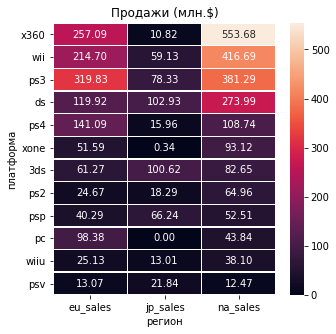

In [28]:
portrait=games_pop.pivot_table(index='platform', values=['na_sales','eu_sales', 'jp_sales'] , aggfunc='sum')
plt.figure(figsize=(5,5))
sns.heatmap(portrait.sort_values(by='na_sales', ascending=False), annot=True, fmt=".2f", linewidths=0.5)
plt.title("Продажи (млн.$)")
plt.xlabel("регион")
plt.ylabel("платформа")
plt.show()

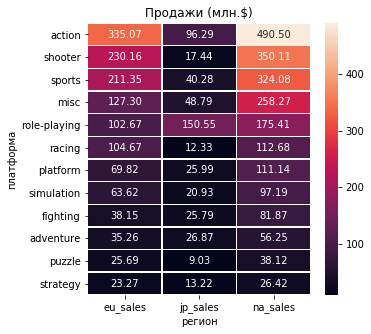

In [29]:
portrait=games_pop.pivot_table(index='genre', values=['na_sales','eu_sales', 'jp_sales'] , aggfunc='sum')
plt.figure(figsize=(5,5))
sns.heatmap(portrait.sort_values(by='na_sales', ascending=False), annot=True, fmt=".2f", linewidths=0.5)
plt.title("Продажи (млн.$)")
plt.xlabel("регион")
plt.ylabel("платформа")
plt.show()

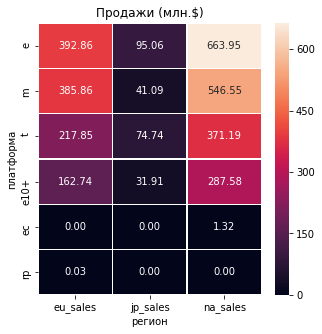

In [30]:
portrait=games_pop.pivot_table(index='rating', values=['na_sales','eu_sales', 'jp_sales'] , aggfunc='sum')
plt.figure(figsize=(5,5))
sns.heatmap(portrait.sort_values(by='na_sales', ascending=False), annot=True, fmt=".2f", linewidths=0.5)
plt.title("Продажи (млн.$)")
plt.xlabel("регион")
plt.ylabel("платформа")
plt.show()

**Вывод**  
NA  
Самые популярные платформы: x360, ps2, wii, ps3, ds  
Самые популярные жанры: action, sports, shooter, misc, racing  
EU  
Самые популярные платформы: ps2, ps3, x360, wii, ps  
Самые популярные жанры: action, sports, shooter, racing, misc  
JP  
Самые популярные платформы: ds, ps2, ps, 3ds, ps3  
Самые популярные жанры: role-playing, action, sports, misc, platform  

Больше всего продаж в Северной Америке, меньше всего в Японии.  
Популярные жанры в Америке и Европе совпадают. Вкусы японцев немного отличаются. Возможно это объясняется культурными различиями.    

Рейтинг ESRB влияет на продажи во всех регионах одинаково.   
Самые большие продажи с рейтингами e, t, m и e10+. А вот с рейтингами ec и rp продажи совсем маленькие или отсутствуют.


## Проверка гипотез

In [31]:
xone=games_pop.query('platform=="xone"').dropna(subset=['user_score'])
pc=games_pop.query('platform=="pc"').dropna(subset=['user_score'])

alpha = .05
results = st.ttest_ind(xone['user_score'], pc['user_score'])
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print()
    
action=games_pop.query('genre=="action"').dropna(subset=['user_score'])
sports=games_pop.query('genre=="sports"').dropna(subset=['user_score'])

results = st.ttest_ind(action['user_score'], sports['user_score'])
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.05554752084307562
Не получилось отвергнуть нулевую гипотезу

p-значение:  8.263266141938706e-13
Отвергаем нулевую гипотезу


**Вывод**  
Сформируем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
Гипотеза подтвердилась.  
Следовательно средние пользовательские рейтинги платформ Xbox One и PC не различаются.

Сформируем другую нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports одинаковые.  
Гипотеза не подтвердилась.  
Значит средние пользовательские рейтинги жанров Action и Sports не одинаковые.

Для проверки обеих гипотез я использовала "Гипотезу о равенстве средних двух генеральных совокупностей". Значение equal_var остаила True, так как выборки взяты из схожих по параметрам совокупностей.

## Общий вывод

Открыла файл, изучила данные.
Подготовила данные для исследований: заменила пропуски, где это возможно. Перевела все данные в нижний регистр. В столбце user_score изменила тип данных object на float.
  
Построила распределение выхода игр по годам. Больше всего игр выходило в 2008-2009 гг.  
Выявила характерный срок, за который появляются новые и исчезают старые платформы - это около 10 лет.   

Определила потенциально прибыльные платформы на 2017 год. Это ps4 и xone.  
Выяснила как влияют оценки критиков и пользователей на продажи внутри платформы.

Определила самые прибыльные жанры: action и shooter. 

Составила портрет для пользователей каждого региона (какие платформы и жанры поплярны в конкретном регионе).

Проверила 2 гипотезы:  
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотеза подтвердилась.
Средние пользовательские рейтинги жанров Action и Sports одинаковые. Гипотеза не подтвердилась.